In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
from tvb.simulator.lab import *

In [9]:
from adex_cleanup import configure_sim, make_alpha_stim

sim.monitors = [monitors.Raw()]
```
# %load -n 'cfgs/carlu_paper.toml'
[parameters]
# all these shall become numpy arrays when loaded
C_m = 150.0
E_L_e = -65.0
E_L_i = -65.0
E_e = 0.0
E_i = -80.0
K_ext_e = 400
K_ext_i = 100 # this is weirdly set to 0 by default as the external drive is excitatory
N_tot = 10000
P_e = [ -49.8e-3, 5.06e-3,  -23.4e-3,  2.3e-3, -0.41e-3, 10.5e-3, -36.6e-3, 7.4e-3, 1.2e-3, -40.7e-3 ]
P_i = [ -51.5e-3,  4.0e-3,  -8.35e-3, 0.24e-3, -0.50e-3, 1.43e-3, -14.7e-3, 4.5e-3, 2.8e-3, -15.3e-3 ]
Q_e = 1.5
Q_i = 5.0
T = 5.0
a_e = 4.0
a_i = 0.0
b_e = 60.0
b_i = 0.0
external_input_ex_ex = 4e-3#0.315e-3
external_input_ex_in = 0.000
external_input_in_ex = 4e-3#0.315e-3
external_input_in_in = 0.000
g = 0.2
g_L = 10.0
p_connect_e = 0.05
p_connect_i = 0.05
tau_OU = 5.0
tau_e = 5.0
tau_i = 5.0
tau_w_e = 500.0
tau_w_i = 1.0
weight_noise = 1e-4

[attributes]
# these are approached on a case-by-case basis
stvar = [7] 
variables_of_interest=['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']
state_variable_range.E = [0.0022, 0.0022] 
state_variable_range.I = [0.01448, 0.01448]
state_variable_range.C_ee = [0.0, 0.0]
state_variable_range.C_ei = [0.0, 0.0]
state_variable_range.C_ii = [0.0, 0.0]
state_variable_range.W_e = [103.0, 103.0] 
state_variable_range.W_i = [0.0, 0.0]
state_variable_range.ou_drift = [0.0, 0.0]
```

In [5]:
sim = configure_sim('cfgs/carlu_paper.toml', noise=False)
for k in sim.model.state_variable_range.keys():
    sim.model.state_variable_range[k] = [0., 0.]

WARNING  File 'hemispheres' not found in ZIP.


In [6]:
(out_t, out_d),  = sim.configure().run(simulation_length=2500)

WARNING  random_state supplied for non-stochastic integration


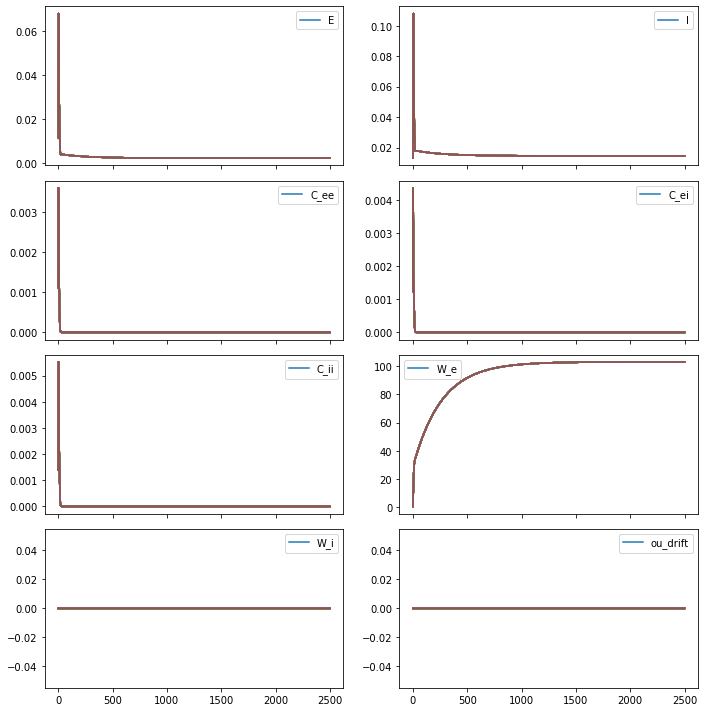

In [7]:
t0=0
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [10]:
sim = configure_sim('cfgs/carlu_paper.toml', noise=False)

sim.stimulus = make_alpha_stim(
    sim.connectivity, 
    stim_params={'amp': 0.5, 't_0': 1500.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 0.0}
)

(out_t, out_d),  = sim.configure().run(simulation_length=2500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


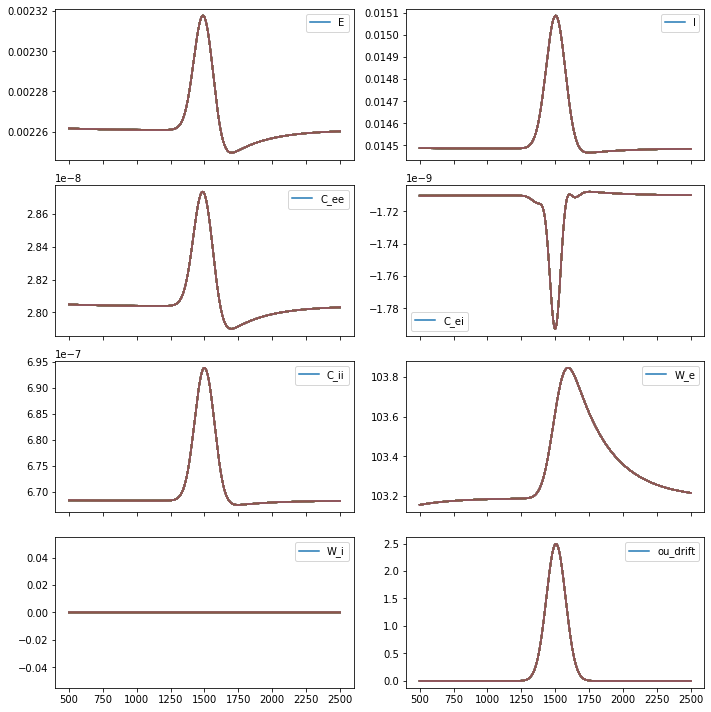

In [11]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [12]:
sim.model.state_variables

['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']

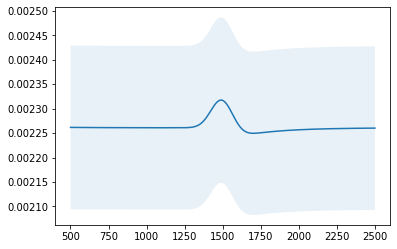

In [13]:
fig, ax = plt.subplots()
n = 0
t = out_t[t0:]
E = out_d[t0:,0,n,0]
I = out_d[t0:,1,n,0]
C_ee = out_d[t0:,2,n,0]
C_ii = out_d[t0:,4,n,0]

ax.plot(out_t[t0:], E)
ax.fill_between(t, E-np.sqrt(C_ee), E+np.sqrt(C_ee), alpha=0.1)


This is off - the baseline firing rates seem to be far too high and the response to stimulus far too low?